In [1]:
#pip install --upgrade tensorflow

In [156]:
#!pip --update tensorflow
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.utils import to_categorical

In [157]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [158]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [159]:
x_test.shape

(10000, 28, 28)

In [160]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [161]:
y_test.shape

(10000,)

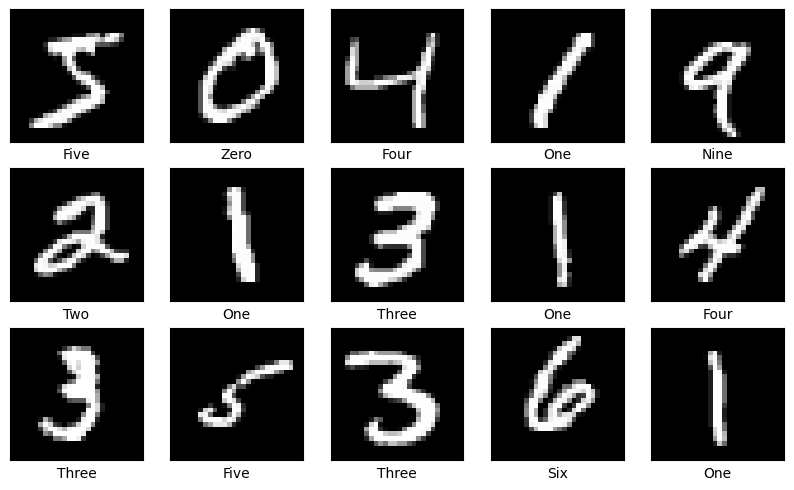

In [162]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])   
plt.show()

In [163]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [164]:
x_train.shape

(60000, 28, 28, 1)

In [165]:
x_test.dtype

dtype('uint8')

In [166]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [167]:
x_train /= 255
x_test /= 255

In [168]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [169]:
y_test.shape

(10000, 10)

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [171]:
#https://keras.io/api/optimizers/
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer=Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam"
),loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:

#history = model.fit(x=x_train,y=y_train, epochs=2)
history=model.fit(x_train, y_train, batch_size=100, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
600/600 [==============================] - 13s 21ms/step - loss: 0.2622 - accuracy: 0.9227 - val_loss: 0.0999 - val_accuracy: 0.9699
Epoch 2/5
600/600 [==============================] - 13s 22ms/step - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.0670 - val_accuracy: 0.9783
Epoch 3/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 4/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0567 - val_accuracy: 0.9835
Epoch 5/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0582 - val_accuracy: 0.9818


In [173]:
tes_loss,test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9818


In [174]:
round(test_acc,2)

0.98

In [175]:
y_pred = model.predict(x_test)     #[image_index].reshape(1,28,28,1))
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([9.2858988e-07, 1.7903045e-05, 3.8104911e-06, 1.3182012e-04,
       1.2704471e-09, 1.5125377e-08, 6.7052870e-11, 9.9984097e-01,
       9.0550309e-08, 4.4574358e-06], dtype=float32)

In [176]:
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [177]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [178]:
y_test_eval = np.argmax(y_test,axis=1)
y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

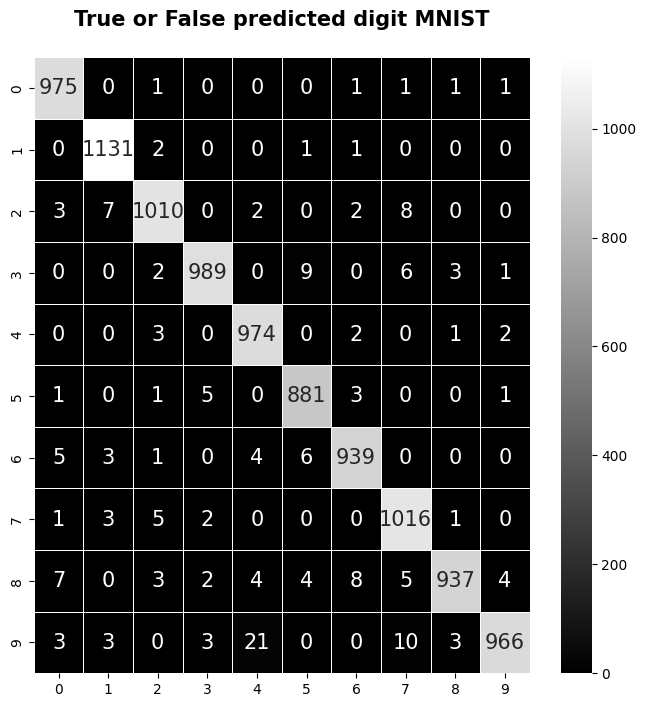

In [179]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_eval,y_pred1)
#plt.style.use('seaborn-deep')
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



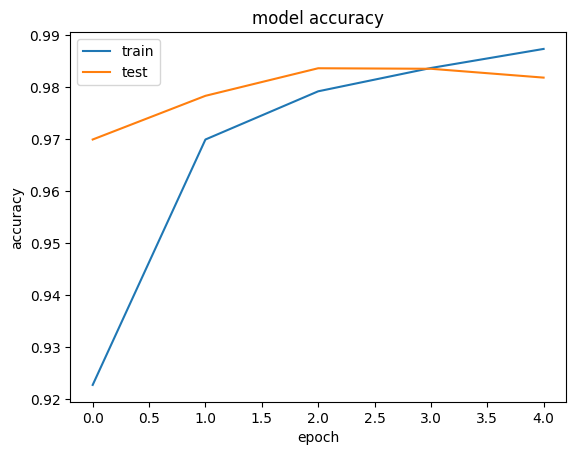

In [181]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

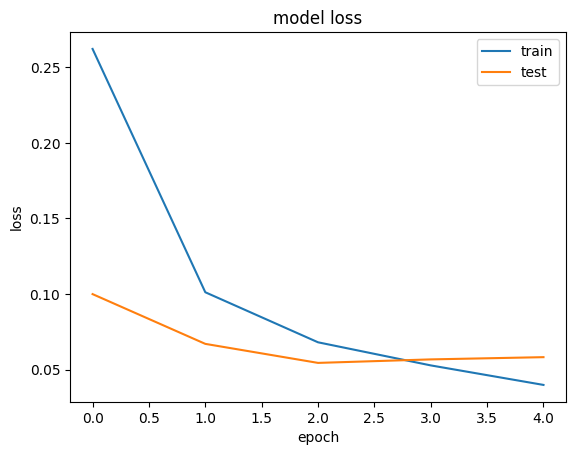

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

1/1 [==============================] - 0s 21ms/step
7


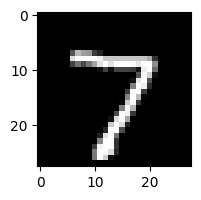

In [183]:
# If i take one input
image_index = [0]
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_index].reshape(28, 28, 1),cmap='gray')
predict = x_test[image_index].reshape(28,28,1)
pred = model.predict(x_test[image_index].reshape(1,28, 28, 1))
print(pred.argmax())

In [184]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

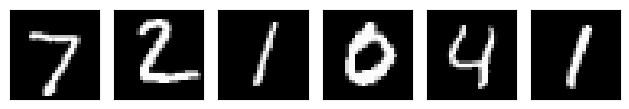

In [185]:
# if you have multi inputs
image_indices = [0, 1, 2, 3, 4, 5]

# Create a single figure with subplots arranged horizontally
fig,axs = plt.subplots(1,6)

# Visualize the images
for i, index in enumerate(image_indices):
    axs[index].imshow(x_test[index].reshape(28, 28), cmap='gray')
    axs[index].set_xticks([])
    axs[index].set_yticks([])

# Ensure tight layout
plt.tight_layout()

# Show the figure
plt.show()

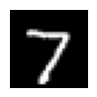

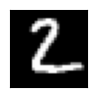

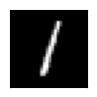

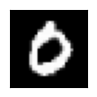

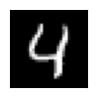

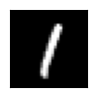

1/1 [==============================] - 0s 20ms/step
Prediction for image 0: 7
1/1 [==============================] - 0s 18ms/step
Prediction for image 1: 2
1/1 [==============================] - 0s 18ms/step
Prediction for image 2: 1
1/1 [==============================] - 0s 19ms/step
Prediction for image 3: 0
1/1 [==============================] - 0s 26ms/step
Prediction for image 4: 4
1/1 [==============================] - 0s 18ms/step
Prediction for image 5: 1


In [186]:
# if i take multi inputs
image_indices = [0,1,2,3,4,5]


# Visualize the images
for index in image_indices:
    plt.figure(figsize=(1,1))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.show()

for index in image_indices:
    #plt.figure(figsize=(2,2))
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))  # Reshape as a batch of one image
    #print(f"Prediction for image {index}: {pred.argmax()}")
    print(f"Prediction for image {index}: {pred.argmax()}")